In [1]:
import tensorflow as tf

In [4]:
import tensorflow as tf 
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [5]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import cv2
import random
import math
import re
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn.visualize import display_instances
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config
from mrcnn import model as modellib, utils




Using TensorFlow backend.


In [6]:
#import custom

# Root directory of the project
ROOT_DIR = "C:/mask_rcnn/Mask_RCNN-master/Mask_RCNN-master"

DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

MODEL_DIR = os.path.join(ROOT_DIR, "logs")


WEIGHTS_PATH = "C:/mask_rcnn/Mask_RCNN-master/Mask_RCNN-master/logs/object20220615T1521/mask_rcnn_object_0274.h5"   # change it

In [13]:
# Root directory of the project
ROOT_DIR = "C:/mask_rcnn/Mask_RCNN-master/Mask_RCNN-master"

In [14]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    
    NAME = "object"

    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 1

    STEPS_PER_EPOCH = 2

    DETECTION_MIN_CONFIDENCE = 0.9

In [15]:
# Code for Customdataset class. Same code is present in custom.py file also
class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):

        self.add_class("object", 1, "sidewalk")
        
        assert subset in ["train", "valid"]
        dataset_dir = os.path.join(dataset_dir, subset)
        annotations1 = json.load(open(os.path.join(dataset_dir, 'sidewalk_json.json')))
       
        annotations = list(annotations1.values())  # don't need the dict keys

        annotations = [a for a in annotations if a['regions']]
        
        # Add images
        for a in annotations:
           
            polygons = [r['shape_attributes'] for r in a['regions']]
            objects = [s['region_attributes']['names'] for s in a['regions']]
            print("objects:",objects)
            name_dict = {"sidewalk": 1}
            num_ids = [name_dict[a] for a in objects]

            print("numids",num_ids)
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "object", 
                image_id=a['filename'],  
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids
                )

    def load_mask(self, image_id):
       
        image_info = self.image_info[image_id]
        if image_info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)

        info = self.image_info[image_id]
        if info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])

            mask[rr, cc, i] = 1

        num_ids = np.array(num_ids, dtype=np.int32)
        return mask, num_ids 
    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "object":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [16]:
# Inspect the model in training or inference modes values: 'inference' or 'training'
TEST_MODE = "inference"

ROOT_DIR = "C:/mask_rcnn/Mask_RCNN-master/Mask_RCNN-master/dataset"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in all visualizations in the notebook.
    Provide a central point to control graph sizes. Adjust the size attribute to control how big to render images"""
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


CUSTOM_DIR = "C:/mask_rcnn/Mask_RCNN-master/Mask_RCNN-master/dataset"
dataset = CustomDataset()
dataset.load_custom(CUSTOM_DIR, "valid")
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
objects: ['sidewalk']
numids [1]
Images: 15
Classes: ['BG', 'sidewalk']


In [17]:
config = CustomConfig()
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [18]:
weights_path = WEIGHTS_PATH
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:/mask_rcnn/Mask_RCNN-master/Mask_RCNN-master/logs/object20220615T1521/mask_rcnn_object_0274.h5






Re-starting from epoch 274


Images: 15
Classes: ['BG', 'sidewalk']
Processing 1 images
image                    shape: (2000, 1500, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2000.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


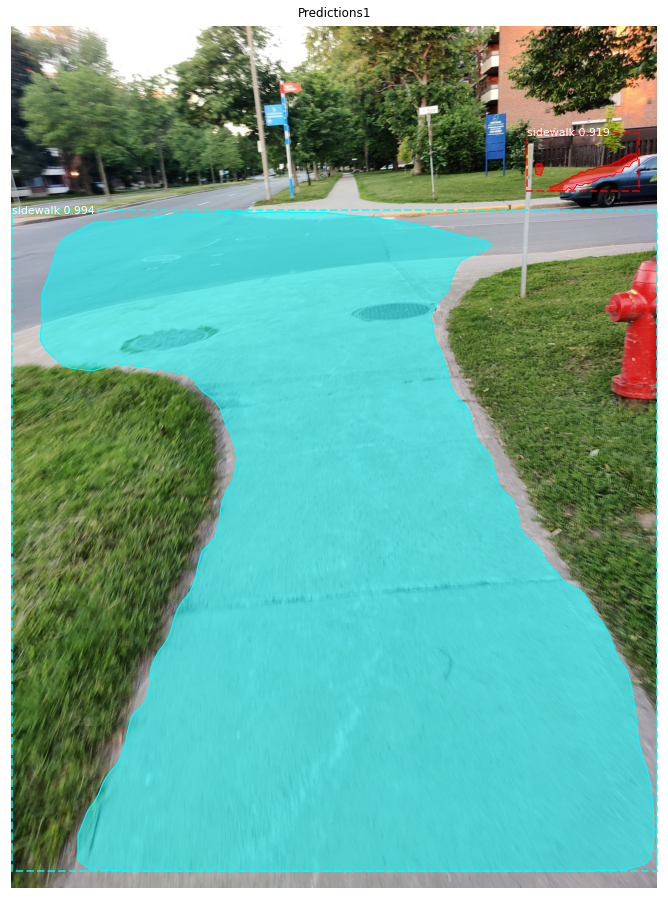

In [23]:
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

path_to_new_image = 'C:/mask_rcnn/Mask_RCNN-master/Mask_RCNN-master/dataset/test/sidewalk40.jpeg'
image1 = mpimg.imread(path_to_new_image)
results1 = model.detect([image1], verbose=1)
ax = get_ax(1)
r1 = results1[0]
visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],
dataset.class_names, r1['scores'], ax=ax, title="Predictions1")
